In [36]:
#Pobieranie odpowiednich bibliotek
!pip install kaggle
!pip install pandas
!pip install unzip
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!kaggle datasets download -d sadiqshah/bike-sales-in-europe


  0%|                                               | 0.00/1.15M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.15M/1.15M [00:00<00:00, 18.2MB/s]


In [41]:
!unzip -o bike-sales-in-europe.zip


Archive:  bike-sales-in-europe.zip
  inflating: Sales.csv               


In [61]:
import pandas as pd
import seaborn as sns

In [43]:
bikes = pd.read_csv('Sales.csv')
bikes

Date  Day     Month  Year  Customer_Age       Age_Group  \
0       2013-11-26   26  November  2013            19     Youth (<25)   
1       2015-11-26   26  November  2015            19     Youth (<25)   
2       2014-03-23   23     March  2014            49  Adults (35-64)   
3       2016-03-23   23     March  2016            49  Adults (35-64)   
4       2014-05-15   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  2016-04-12   12     April  2016            41  Adults (35-64)   
113032  2014-04-02    2     April  2014            18     Youth (<25)   
113033  2016-04-02    2     April  2016            18     Youth (<25)   
113034  2014-03-04    4     March  2014            37  Adults (35-64)   
113035  2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0                    M          Canada  British Columbia      Accessories   
1                    M          Canada  British Columbia      Accessories   
2                    M       Australia   New South Wales      Accessories   
3                    M       Australia   New South Wales      Accessories   
4                    F       Australia   New South Wales      Accessories   
...                ...             ...               ...              ...   
113031               M  United Kingdom           England         Clothing   
113032               M       Australia        Queensland         Clothing   
113033               M       Australia        Queensland         Clothing   
113034               F          France     Seine (Paris)         Clothing   
113035               F          France     Seine (Paris)         Clothing   

       Sub_Category              Product  Order_Quantity  Unit_Cost  \
0        Bike Racks  Hitch Rack - 4-Bike               8         45   
1        Bike Racks  Hitch Rack - 4-Bike               8         45   
2        Bike Racks  Hitch Rack - 4-Bike              23         45   
3        Bike Racks  Hitch Rack - 4-Bike              20         45   
4        Bike Racks  Hitch Rack - 4-Bike               4         45   
...             ...                  ...             ...        ...   
113031        Vests      Classic Vest, S               3         24   
113032        Vests      Classic Vest, M              22         24   
113033        Vests      Classic Vest, M              22         24   
113034        Vests      Classic Vest, L              24         24   
113035        Vests      Classic Vest, L              23         24   

        Unit_Price  Profit  Cost  Revenue  
0              120     590   360      950  
1              120     590   360      950  
2              120    1366  1035     2401  
3              120    1188   900     2088  
4              120     238   180      418  
...            ...     ...   ...      ...  
113031          64     112    72      184  
113032          64     655   528     1183  
113033          64     655   528     1183  
113034          64     684   576     1260  
113035          64     655   552     1207  

[113036 rows x 18 columns]

In [17]:
bikes.isnull().sum()
#Zbiór jest już wyczyszczony z artefaktów

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [56]:
#Normalizacja danych poprzez ustawienie małych liter w zbiorze
bikes['Month'] = bikes['Month'].str.lower()
bikes['Age_Group'] = bikes['Age_Group'].str.lower()
bikes['Country'] = bikes['Country'].str.lower()
bikes['State'] = bikes['State'].str.lower()
bikes['Product_Category'] = bikes['Product_Category'].str.lower()
bikes['Sub_Category'] = bikes['Sub_Category'].str.lower()
bikes['Product'] = bikes['Product'].str.lower()


In [57]:
#Podział na zbiory
from sklearn.model_selection import train_test_split


In [58]:
bikes_train, bikes_test = train_test_split(bikes, test_size=0.2, random_state=1)

In [59]:
bikes_test

Date  Day      Month  Year  Customer_Age             Age_Group  \
31242   2013-09-02    2  september  2013            25  young adults (25-34)   
76421   2015-10-06    6    october  2015            29  young adults (25-34)   
63417   2016-05-04    4        may  2016            44        adults (35-64)   
13214   2013-11-23   23   november  2013            42        adults (35-64)   
17882   2013-12-25   25   december  2013            46        adults (35-64)   
...            ...  ...        ...   ...           ...                   ...   
36385   2016-06-29   29       june  2016            40        adults (35-64)   
11506   2014-03-04    4      march  2014            44        adults (35-64)   
52187   2015-12-18   18   december  2015            23           youth (<25)   
83391   2015-12-12   12   december  2015            26  young adults (25-34)   
112433  2015-09-17   17  september  2015            32  young adults (25-34)   

       Customer_Gender         Country                State Product_Category  \
31242                F       australia           queensland      accessories   
76421                M       australia           queensland      accessories   
63417                F   united states               oregon            bikes   
13214                F   united states           washington      accessories   
17882                F         germany  nordrhein-westfalen         clothing   
...                ...             ...                  ...              ...   
36385                F       australia      new south wales      accessories   
11506                F   united states           california      accessories   
52187                M  united kingdom              england            bikes   
83391                F       australia             victoria      accessories   
112433               M         germany              hamburg         clothing   

             Sub_Category                    Product  Order_Quantity  \
31242             helmets      sport-100 helmet, red              11   
76421     tires and tubes           ll mountain tire              30   
63417          road bikes         road-750 black, 44               1   
13214   bottles and cages       mountain bottle cage              29   
17882                caps               awc logo cap              19   
...                   ...                        ...             ...   
36385             helmets      sport-100 helmet, red               1   
11506   bottles and cages      water bottle - 30 oz.              20   
52187      mountain bikes  mountain-400-w silver, 46               1   
83391     tires and tubes               ml road tire              22   
112433              vests            classic vest, l              31   

        Unit_Cost  Unit_Price  Profit  Cost  Revenue  
31242          13          35     180   143      323  
76421           9          25     360   270      630  
63417         344         540     120   344      464  
13214           4          10     110   116      226  
17882           7           9      16   133      149  
...           ...         ...     ...   ...      ...  
36385          13          35      17    13       30  
11506           2           5      58    40       98  
52187         420         769     318   420      738  
83391           9          25     237   198      435  
112433         24          64    1101   744     1845  

[22608 rows x 18 columns]

In [63]:
bikes_train

Date  Day      Month  Year  Customer_Age             Age_Group  \
47030   2014-01-10   10    january  2014            23           youth (<25)   
36579   2016-05-04    4        may  2016            34  young adults (25-34)   
88485   2016-01-06    6    january  2016            34  young adults (25-34)   
12816   2014-07-15   15       july  2014            40        adults (35-64)   
109397  2015-11-29   29   november  2015            22           youth (<25)   
...            ...  ...        ...   ...           ...                   ...   
50057   2015-11-16   16   november  2015            24           youth (<25)   
98047   2013-09-10   10  september  2013            28  young adults (25-34)   
5192    2016-05-26   26        may  2016            33  young adults (25-34)   
77708   2013-11-11   11   november  2013            63        adults (35-64)   
98539   2016-04-14   14      april  2016            46        adults (35-64)   

       Customer_Gender        Country            State Product_Category  \
47030                F         france           loiret         clothing   
36579                F  united states       california      accessories   
88485                M         france           loiret      accessories   
12816                M        germany           bayern      accessories   
109397               F      australia       queensland            bikes   
...                ...            ...              ...              ...   
50057                M  united states       washington            bikes   
98047                M      australia  new south wales      accessories   
5192                 M      australia  new south wales      accessories   
77708                M  united states       california      accessories   
98539                M  united states       washington      accessories   

             Sub_Category                         Product  Order_Quantity  \
47030             jerseys  short-sleeve classic jersey, l               2   
36579             helmets         sport-100 helmet, black              14   
88485     tires and tubes               touring tire tube              20   
12816   bottles and cages           water bottle - 30 oz.               6   
109397      touring bikes           touring-2000 blue, 46               1   
...                   ...                             ...             ...   
50057      mountain bikes         mountain-200 silver, 38               3   
98047     tires and tubes                    ml road tire              12   
5192    bottles and cages           water bottle - 30 oz.              15   
77708     tires and tubes                hl mountain tire              21   
98539     tires and tubes                    hl road tire              22   

        Unit_Cost  Unit_Price  Profit  Cost  Revenue  
47030          42          54      12    84       96  
36579          13          35     298   182      480  
88485           2           5      49    40       89  
12816           2           5      18    12       30  
109397        755        1215     266   755     1021  
...           ...         ...     ...   ...      ...  
50057        1266        2320    1631  3798     5429  
98047           9          25     153   108      261  
5192            2           5      35    30       65  
77708          13          35     447   273      720  
98539          12          33     302   264      566  

[90428 rows x 18 columns]

In [64]:
bikes["Age_Group"].value_counts()

adults (35-64)          55824
young adults (25-34)    38654
youth (<25)             17828
seniors (64+)             730
Name: Age_Group, dtype: int64

<Axes: >

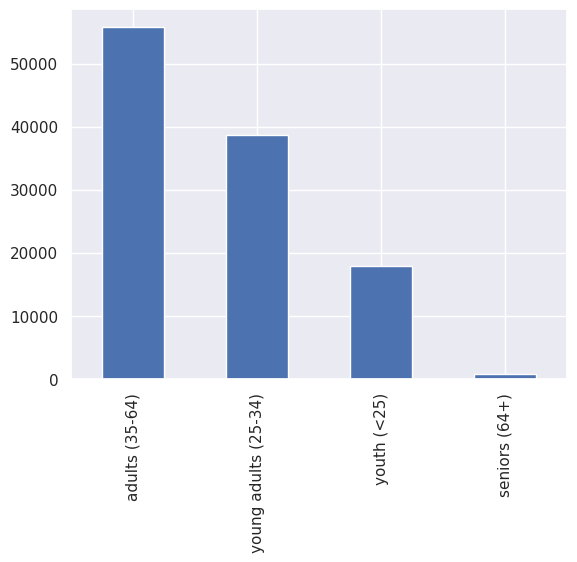

In [65]:
bikes["Age_Group"].value_counts().plot(kind="bar")

In [66]:
 bikes[["Year","Profit"]].groupby("Year").mean()

Profit
Year             
2011  1076.317146
2012  1102.724318
2013   243.800188
2014   199.472311
2015   308.004868
2016   239.334240

<Axes: xlabel='Year'>

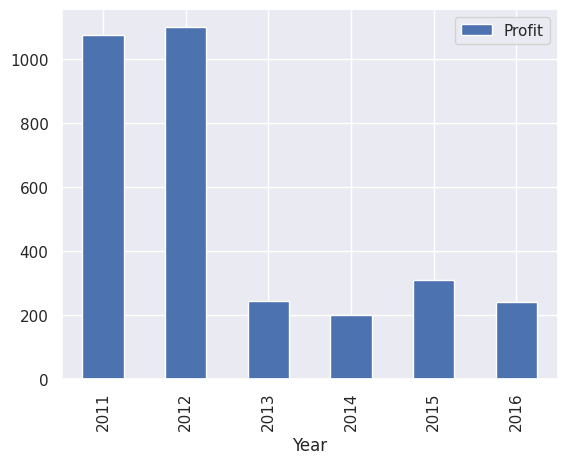

In [67]:
 bikes[["Year","Profit"]].groupby("Year").mean().plot(kind="bar")

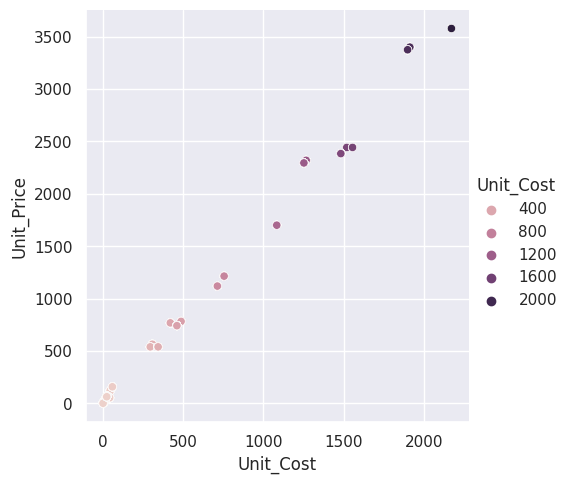

In [68]:
sns.set_theme()
sns.relplot(data=bikes, x="Unit_Cost", y="Unit_Price", hue="Unit_Cost")